# Análise: Clusterização

Com a implementação da clusterização foi gerado o arquivo "segmentation_data_clustering.csv". A partir desse arquivo, o presente notebook propõe a análise dos atributos a partir dos clusters.


## Inspeção Inicial

In [158]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [159]:
# Carregando a base:
df_clusters = pd.read_csv('data/segmentation_data_clustering.csv')
df_clusters.head()

,Unnamed: 0,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,0,67,2,124670,1,2,2
1,1,1,1,22,1,150773,1,2,3
2,2,0,0,49,1,89210,0,0,0
3,3,0,0,45,1,171565,1,1,3
4,4,0,0,53,1,149031,1,1,3


In [160]:
# Dropar coluna ID
df_clusters.drop(columns='Unnamed: 0', inplace=True)

In [161]:
# Visualizar os tipos de variáveis
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
 7   cluster          2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


## Análise dos Clusters

In [162]:
df_clusters.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000,1.693000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533,1.073931
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000,2.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000,3.000000


In [163]:
# Análise dos clusters
df_clusters['cluster'].value_counts(normalize=True)

cluster
2    0.4775
0    0.2415
3    0.2285
1    0.0525
Name: proportion, dtype: float64

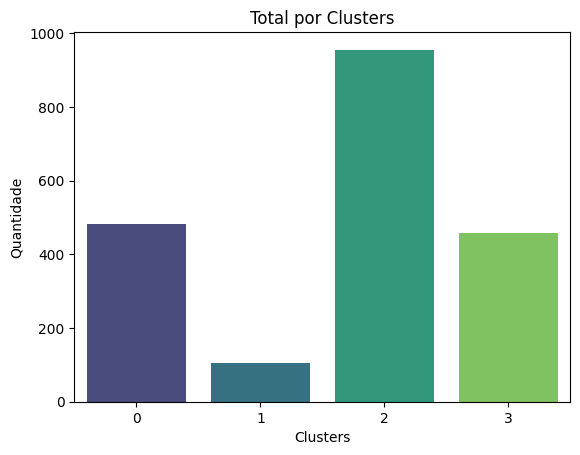

In [164]:
sns.countplot(df_clusters, x=df_clusters['cluster'], palette='viridis').set_title("Total por Clusters")
plt.xlabel('Clusters')
plt.ylabel('Quantidade')
plt.show()

In [165]:
df_clusters.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803,-0.124712
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041,-0.029944
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751,0.196117
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732,0.137723
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881,0.546109
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795,0.535882
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000,0.405740
cluster,-0.124712,-0.029944,0.196117,0.137723,0.546109,0.535882,0.405740,1.000000


<Axes: >

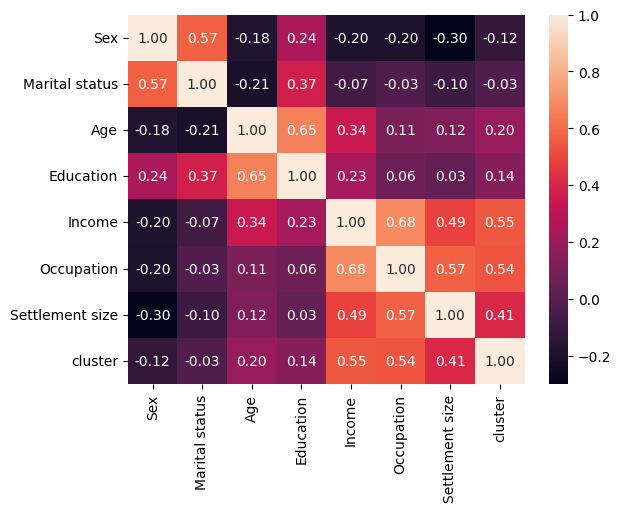

In [166]:
sns.heatmap(df_clusters.corr(), fmt='.2f', annot=True)

Observa-se que o cluster tem maior correlação positiva com os atributos: Income, Occupation e Settlement size.

**Ocupação**

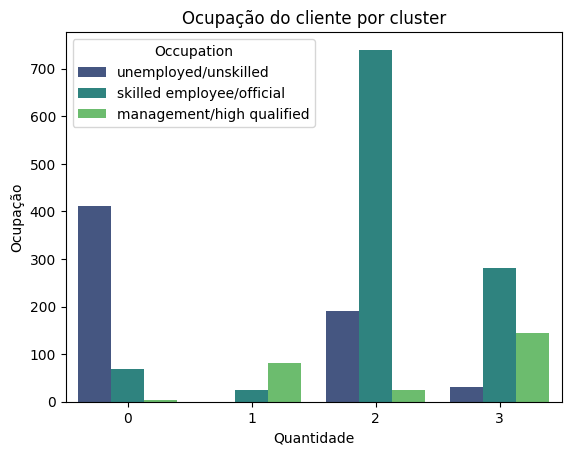

In [167]:
df_clusters['Occupation'] = df_clusters['Occupation'].map({0: 'unemployed/unskilled', 1: 'skilled employee/official', 2:'management/high qualified'})
sns.countplot(data=df_clusters, x='cluster', palette='viridis', hue='Occupation')

plt.title('Ocupação do cliente por cluster')
plt.xlabel('Quantidade')
plt.ylabel('Ocupação')
plt.show()

In [168]:
cluster_occupation = pd.crosstab(df_clusters['cluster'], df_clusters['Occupation'], normalize='index')
cluster_occupation

Occupation,management/high qualified,skilled employee/official,unemployed/unskilled
cluster,,,
0,0.006211,0.140787,0.853002
1,0.771429,0.228571,0.000000
2,0.026178,0.774869,0.198953
3,0.317287,0.614880,0.067834


<Axes: xlabel='Occupation', ylabel='cluster'>

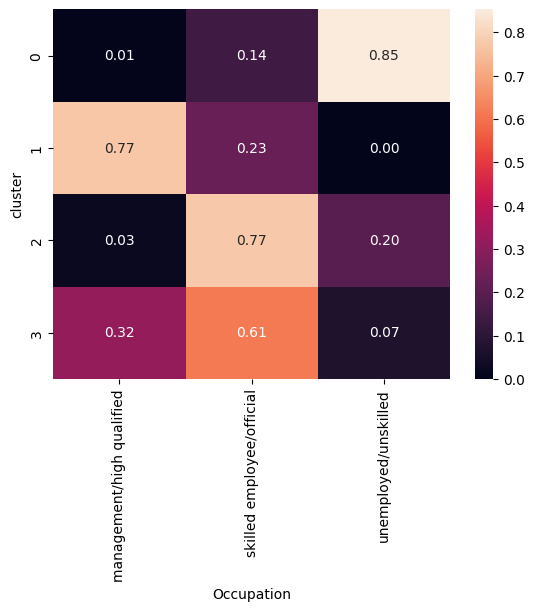

In [169]:
sns.heatmap(cluster_occupation, fmt='.2f', annot=True)

**Income**

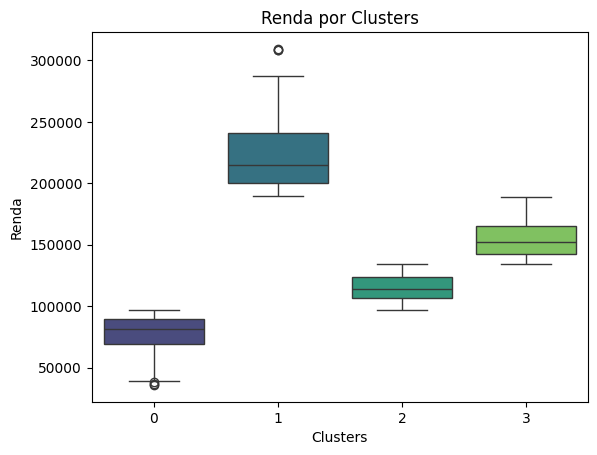

In [170]:
sns.boxplot(data=df_clusters, x='cluster' , y='Income', palette='viridis')
plt.title('Renda por Clusters')
plt.ylabel('Renda')
plt.xlabel('Clusters')
plt.show()

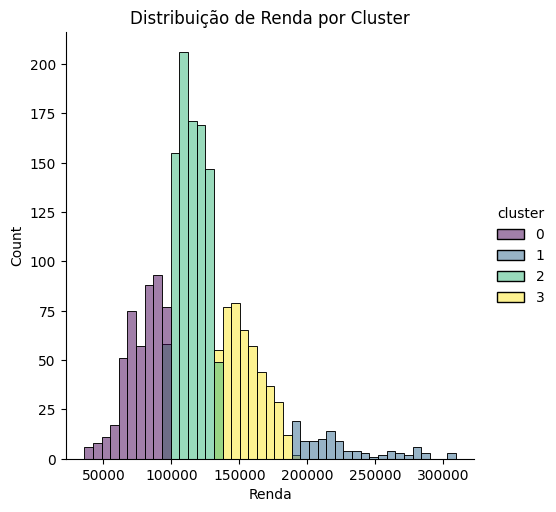

In [171]:
sns.displot(data=df_clusters, x='Income', hue='cluster', palette='viridis')
plt.title('Distribuição de Renda por Cluster')
plt.xlabel('Renda')
plt.show()

**Settlement Size**

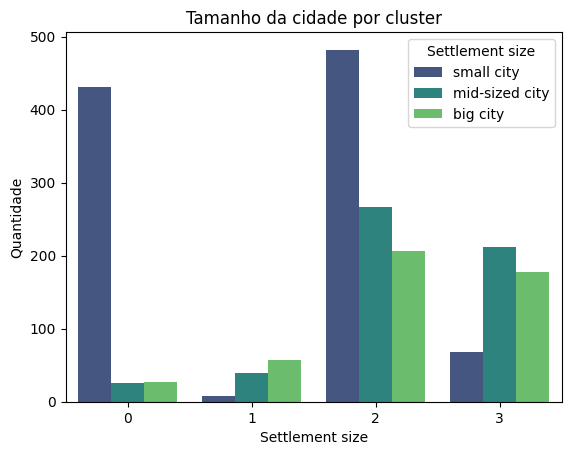

In [ ]:
df_clusters['Settlement size'] = df_clusters['Settlement size'].map({0: 'small city', 1: 'mid-sized city', 2:'big city'})
sns.countplot(data=df_clusters, x='cluster', hue='Settlement size', palette='viridis')
plt.title('Tamanho da cidade por cluster')
plt.xlabel('Settlement size')
plt.ylabel('Quantidade')
plt.show()

**Cluster 0** : Segunda maior representação na base: 24,15%. Majoritariamente desempregados, baixa renda (até 100.000) e vivem em cidade pequena.

**Cluster 1** : Menor representação na base.: 5,25%. Profissionais altamente qualificados (gerentes), alta renda (maior: 200.000-300.000) e vivem em cidade grande.

**Cluster 2** : Maior representação na base: 47,75%. Profissionais qualificados (oficial), segunda menor renda da base (100.000-150.000) e vivem em cidade pequena. 

**Cluster 3** : Terceira maior representação na base: 22,85%. 61% de profissionais qualificados e 32% altamente qualificados, segunda maior renda (150.000 - 200.000) e vivem majoritariamente em cidade de médio porte, seguido por grande porte e por último pequeno porte.

**Gênero**

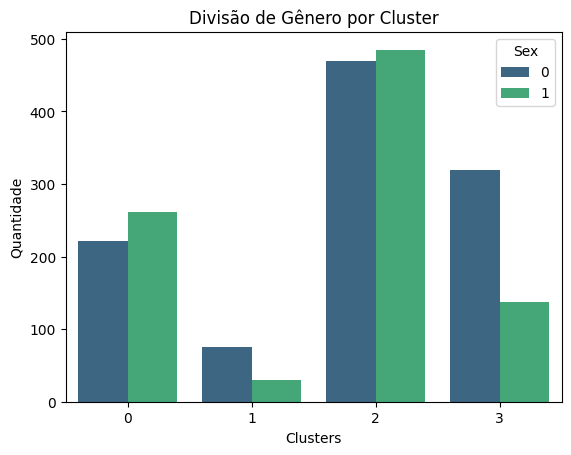

In [173]:
sns.countplot(df_clusters, x=df_clusters['cluster'], palette='viridis', hue='Sex')
plt.title('Divisão de Gênero por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Quantidade')
plt.show()

**Marital Status**

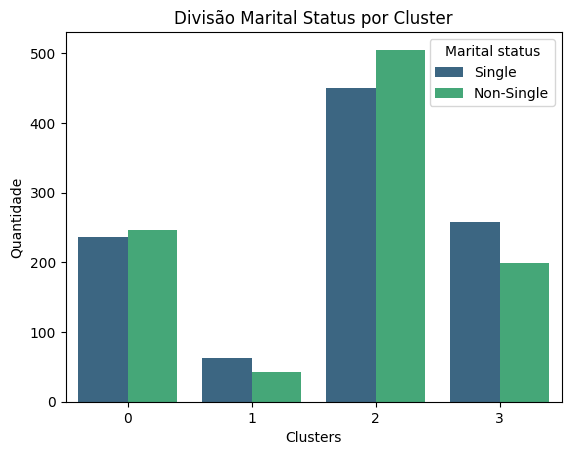

In [174]:
df_clusters['Marital status'] = df_clusters['Marital status'].map({0:'Single', 1:'Non-Single'})
sns.countplot(df_clusters, x=df_clusters['cluster'], palette='viridis', hue='Marital status')
plt.title('Divisão Marital Status por Cluster')
plt.xlabel('Clusters')
plt.ylabel('Quantidade')
plt.show()

**Idade**

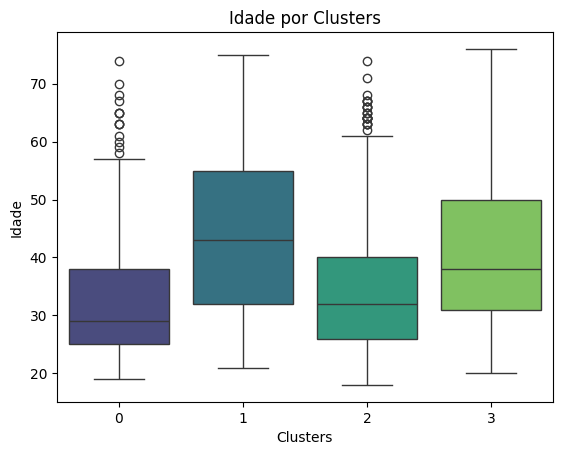

In [175]:
sns.boxplot(data=df_clusters, x='cluster' , y='Age', palette='viridis')
plt.title('Idade por Clusters')
plt.ylabel('Idade')
plt.xlabel('Clusters')
plt.show()

Cluster 1 e 3 são mais ricos, compostos por profissionais altamente qualificados e qualificados, respectivamente, vivem em cidade de médio-grande porte e são compostos majoritariamente por homens solteiros. Representam as pessoas mais velhas da base, com mediana em torno de 40.

Cluster 0 e 2 são mais pobres, compostos por profissionais desempregados e qualificados, respectivamente, vivem em cidades pequenas e compostos majoritariamente por mulheres não-solteiras (divorciadas, separadas, casadas, viúvas). Também representam as pessoas mais novas dataset, tendo a mediana em torno de 30.

Text(0, 0.5, 'Escolaridade')

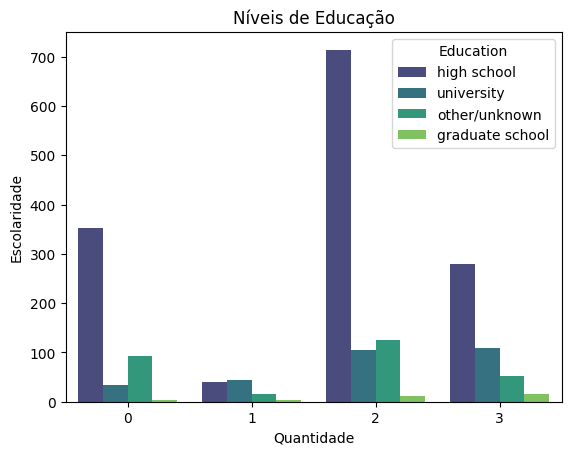

In [176]:
df_clusters['Education'] = df_clusters['Education'].map({0: 'other/unknown', 1: 'high school', 2:'university', 3:'graduate school'})
sns.countplot(data=df_clusters, x='cluster', palette='viridis', hue='Education')

plt.title('Níveis de Educação')
plt.xlabel('Quantidade')
plt.ylabel('Escolaridade')